<a href="https://colab.research.google.com/github/Luke-Coffman/IS-4487/blob/main/Labs/Scripts/lab3_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 3

## Outline

Repeat exercises from Lab 2, but with the *SuperStore Retail Orders* dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab3_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [10]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [12]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/sample_data/superstore_retail_orders.csv')

print (df)

Mounted at /content/gdrive
      customer_id      customer_name          address_line_1          city  \
0              67      Gordy Matteau     59 Northland Circle    Wilmington   
1             201     Cort Paskerful         769 Buell Drive    Huntsville   
2              45    Willetta Lumley       41 Ridgeway Alley        Irvine   
3             106   Alison Batterton           489 Erie Hill      Richmond   
4             357  Martelle Paxeford    451 Manitowish Place      Richmond   
...           ...                ...                     ...           ...   
9564          637  Jayson Andriessen  0819 Crownhardt Circle     Allentown   
9565          370    Darby Tesseyman     7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari      89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne    9630 Washington Hill     Watertown   
9568          482       Matelda Bull      6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  o

## Prepare Data

➡️ Assignment Tasks
- Convert the Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [14]:
df['total_amount'] = df['total_amount'].replace('[\$,]', '', regex=True).astype(float)
df = df.dropna()
df['order_month'] = df['order_month'].str.strip()
df.head()

,customer_id,customer_name,address_line_1,city,state_province,postal_code,order_id,order_date,customer_id.1,order_id.1,product_id,quantity,product_id.1,product_name,product_price,total_amount,order_year_month,order_month
0,67,Gordy Matteau,59 Northland Circle,Wilmington,DE,19805.0,1001,2020-01-11,67,1001,106,3.0,106,Great value Juice,$1.99,5.97,2020-01,January
1,201,Cort Paskerful,769 Buell Drive,Huntsville,AL,35810.0,1002,2019-11-22,201,1002,104,2.0,104,Desk,$85.98,171.96,2019-11,November
2,45,Willetta Lumley,41 Ridgeway Alley,Irvine,CA,92612.0,1003,2019-09-17,45,1003,107,5.0,107,Dove deodorant,$3.99,19.95,2019-09,September
3,106,Alison Batterton,489 Erie Hill,Richmond,VA,23293.0,1004,2019-12-09,106,1004,106,8.0,106,Great value Juice,$1.99,15.92,2019-12,December
4,357,Martelle Paxeford,451 Manitowish Place,Richmond,VA,23293.0,1005,2019-06-08,357,1005,107,7.0,107,Dove deodorant,$3.99,27.93,2019-06,June


## Summarize Data

➡️ Assignment Tasks
- Display the average price per month
- Display the total revenue for all months

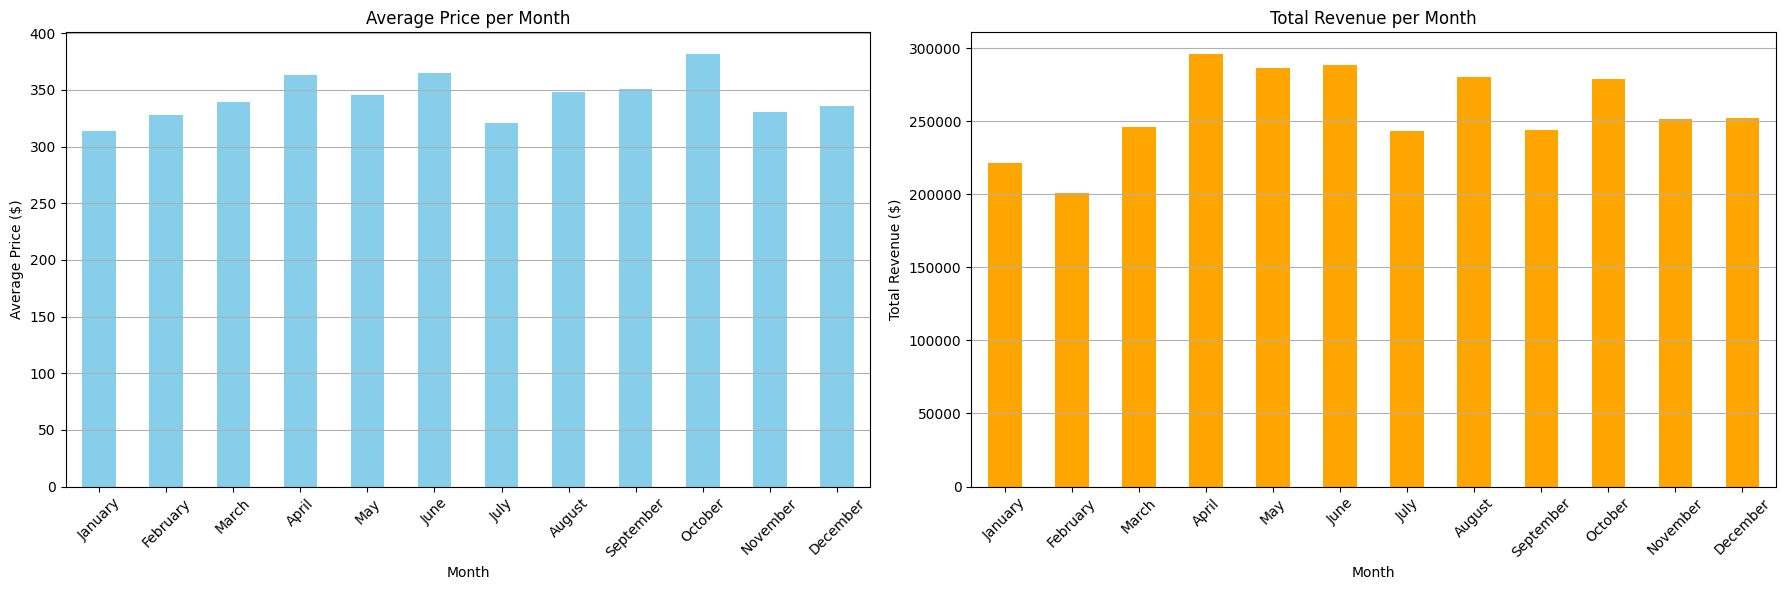

In [17]:
#average price
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

average_price_per_month = df.groupby('order_month')['total_amount'].mean()
total_revenue_per_month = df.groupby('order_month')['total_amount'].sum()

# Reorder the months in the correct chronological order
average_price_per_month = average_price_per_month.reindex(months_order)
total_revenue_per_month = total_revenue_per_month.reindex(months_order)

# Plotting the bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot for average price per month
average_price_per_month.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Price per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Price ($)')
axes[0].set_xticklabels(months_order, rotation=45)
axes[0].grid(axis='y')

# Plot for total revenue per month
total_revenue_per_month.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Revenue per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Revenue ($)')
axes[1].set_xticklabels(months_order, rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
#total revenue